## 1: First we import the required modules

In [1]:
import torch
# import graphviz
# from graphviz import Digraph

In [1]:
# pip install mlagents

In [2]:
# pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.7.1-py3-none-any.whl

In [3]:
# pip install unityagents

In [4]:
# pip install torchviz

In [ ]:
import random
import torch
from torch import nn
from model import DuelingDQN
from model import DQN
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from mlagents_envs.environment import UnityEnvironment
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

%matplotlib inline

In [1]:
import fnn_model

In [2]:
from fnn_model import FNN_Model

## 2: Before you run the next cell make sure you have done the following:
- Downloaded the required environment for your operating system. Details in README.MD
- Extracted the enviroment and placed folder into same directory as results.ipynb
- Change the arg: "file_name" below to the correct environment path if required. 

The following cell initiates the Unity environment 

In [ ]:
from mlagents_envs.environment import UnityEnvironment

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana")
env.reset()

UnityEnvironmentException: Couldn't launch the ../Builds/FoodCollector/FoodCollector.exe environment. Provided filename does not match any environments.

## 3:Now we create the brain to interact with the environment

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 4: Next cell provides a simple example of the environment and prints out the following:
- Number of Agents(brains), 
- The number of actions 4(forwards, backward, left, right) 
- The State as a vector
- the length of the State vector

In [24]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         0.         0.         1.         0.         0.
 0.         1.         0.         0.28421077 0.         1.
 0.         0.         0.20498358 0.         1.         0.
 0.         0.62879598 0.         1.         0.         0.
 0.27240798 0.         1.         0.         0.         0.4731611
 0.         0.         1.         0.         0.19924538 0.
 0.        ]
States have length: 37


## 5: We now import the Agent and assign it a variable

There are three implementation that can be called with the arg:network
- "dqn" = Vanilla DQN
- "double" = Double DQN
- "duel" = Dueling DDQN


The Hyperparamters for all Agents variations have been set to the following. I played with the hyperparamters and trainined endless versions but decied these worked the best. If getting to the score of 13 was the most important than increasing the TAU, LR or eps_decay increased the traninig speeds but did not reach as high scores. A score of 13 could be achieved in as little as 122 episodes but this varied massivly between each training. The below achieved very consistant scores that trained fast and achieved a final score of 17 or more. 

    ```
	BUFFER_SIZE = 100000  # replay buffer size
    BATCH_SIZE = 64         # minibatch size
    GAMMA = 0.99            # discount factor
    TAU = 0.01              # for soft update of target parameters
    LR = 0.0005              # learning rate 
    UPDATE_EVERY = 4        # how often to update the network
    
    eps_start=1.0           #Initital epsilon for Epsilon greedy Action
    eps_end=0.01            #Minimun Epsilon 
    eps_decay=0.95          #Epsilon decay rate
	```


In [25]:
from agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=2, network= FNN_Model)

## 6: Lets take a look at the base DQN model
- The model  has 3 fully connected layers with 64 nodes each. 
- It takes an input of 37 (state vector) and output of 4 (action space)
- Rulu activation between layers 
- Adam optermizer.

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

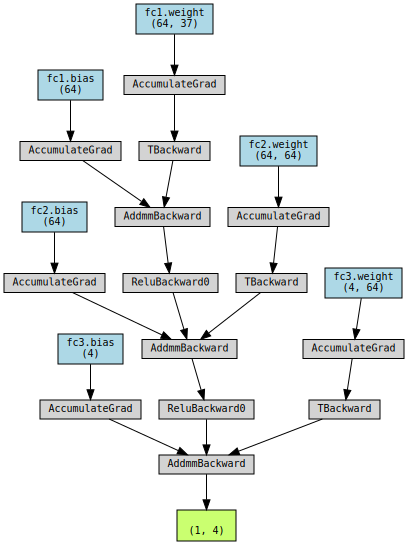

In [27]:
model = DQN(37, 4, 42)
x = Variable(torch.randn(1,37))
y = model(x)
             
make_dot(y, params=dict(list(model.named_parameters())))

## 7: Lets take a look at the Dueling DDQN model
- The model  has 3 fully connected layers with 64 nodes each. 
- It takes an input of 37 (state vector) and output of 4 (action space)
- Third layer is split into a Advantage and Value fully connected layer
- The advantage layer outputs 4 (number of actions)
- the Value layer outputs 1
- The final output is caluculated by Q(s,a)=V(s)+(A(s,a)-avg_a(A(s,a)))
- Rulu activation is used between layers 
- Adam optermizer.

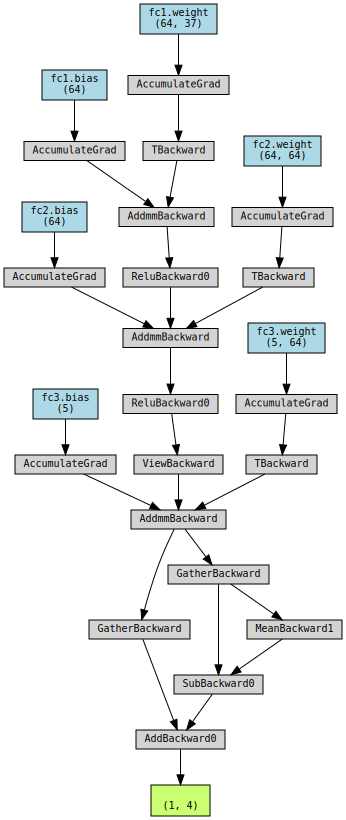

In [28]:
model = DuelingDQN(37, 4, 42)
x = Variable(torch.randn(1,37))
y = model(x)
             
make_dot(y, params=dict(list(model.named_parameters())))

## 8: Run the Deep Q-Learning algorithm and training steps:

The folloing cell provides the main training function. I have changed the required score for solving the environment from 13 to 17 for a little bit more of a challenge.



Episode 100	Average Score: 0.23	
Episode 200	Average Score: 0.85	
Episode 300	Average Score: 1.45	
Episode 400	Average Score: 1.56	
Episode 500	Average Score: 1.45	
Episode 600	Average Score: 1.50	
Episode 700	Average Score: 2.30	
Episode 800	Average Score: 2.95	
Episode 900	Average Score: 3.31	
Episode 1000	Average Score: 4.36	
Episode 1100	Average Score: 5.43	
Episode 1200	Average Score: 5.27	
Episode 1300	Average Score: 4.96	
Episode 1400	Average Score: 5.45	
Episode 1500	Average Score: 5.76	
Episode 1600	Average Score: 6.64	
Episode 1700	Average Score: 6.24	
Episode 1800	Average Score: 7.46	
Episode 1900	Average Score: 6.61	
Episode 2000	Average Score: 6.16	


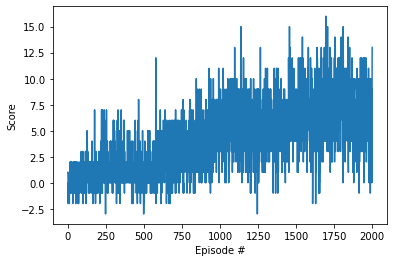

In [29]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.95):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    count = 0                          # counter to Target update frequency
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]  # view 37 dimentional state vector  
        score = 0 # Score per episode
        for t in range(max_t):
            count += 1
            action = agent.act(state, eps)                 #Get epsilon-greedy action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done, count) # Record results to experiance replay and perform learning 
            state = next_state
            score += reward
            
            if count >= 1:
                count = 0
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}\t'.format(i_episode, np.mean(scores_window)), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=17.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 9 Load the saved weights for the network

In [ ]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

<All keys matched successfully>

## 10: Now sit back and watch the MASTER trained network collect Bannanas.

In [ ]:

# watch the Master agent
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 12.0


In [ ]:
env.close()